### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [115]:
data = pd.read_csv('data/coupons.csv')

In [116]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Columns with missing values:
Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

Summary of missing values:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


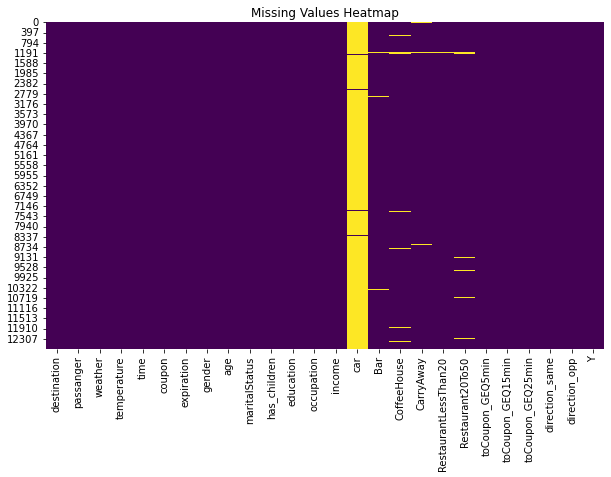

In [118]:
# Identify columns with missing values
missing_columns = data.columns[data.isnull().any()]

print("Columns with missing values:")
print(missing_columns)

# Checking missing data
missing_summary = data[missing_columns].isnull().sum()
print("\nSummary of missing values:")
print(missing_summary)

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

the 'car' column has a significant number of missing values (12576 out of the total rows). The other columns have relatively fewer missing values. So there is no need to keep it, we can drop it , for the other columns we can think of imputation techniques.

In [119]:
# Investivating the other columns with missing data ( Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50)7
missing_data_columns = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20","Restaurant20To50"]
for col in missing_data_columns:
    print(f"{data[col].value_counts()}\n")

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64



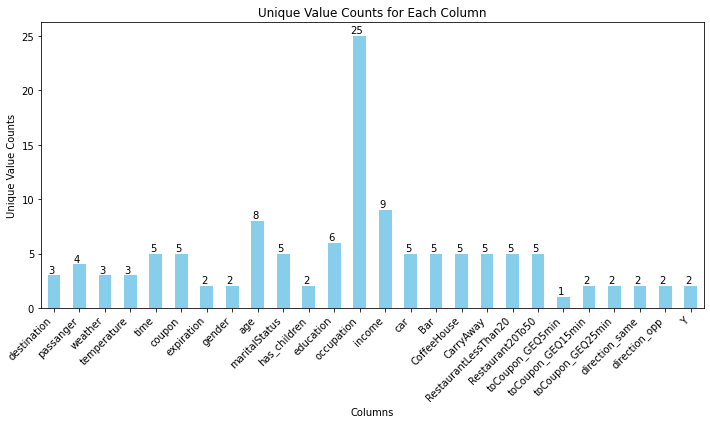

In [120]:
# Checking value count for each column
unique_value_counts = data.nunique()

plt.figure(figsize=(10, 6))
bars = unique_value_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Value Counts for Each Column')
plt.xlabel('Columns')
plt.ylabel('Unique Value Counts')
plt.xticks(rotation=45, ha='right')

# Add values on top of each bar
for bar, count in zip(bars.patches, unique_value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The toCoupon_GEQ5min variable does not reveal any discernible patterns or variations within the dataset.

In [121]:
# Checking for Duplicates
duplicates = data.duplicated()
print(duplicates.sum())

74


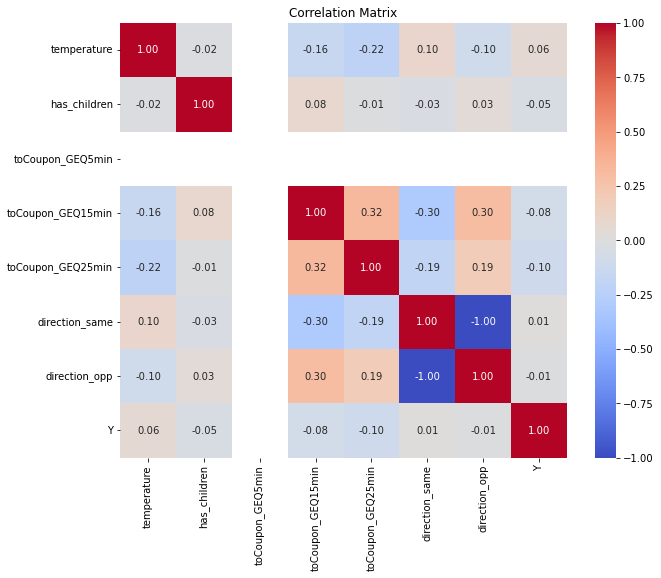

In [122]:
# Explore relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Given the high correlation between 'direction_same' and 'direction_opp,' there is redundancy in keeping both variables. Therefore, it is sufficient to retain just one of them, as the information conveyed by one can be inferred from the other.

3. Decide what to do about your missing data -- drop, replace, other...

In [123]:
df = data.drop(['car'], axis=1) # Drop column ‘car’ as it has almost all null values

In [124]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [125]:
# Replace missing values with the most frequent value for the other columns
for column in missing_data_columns:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)

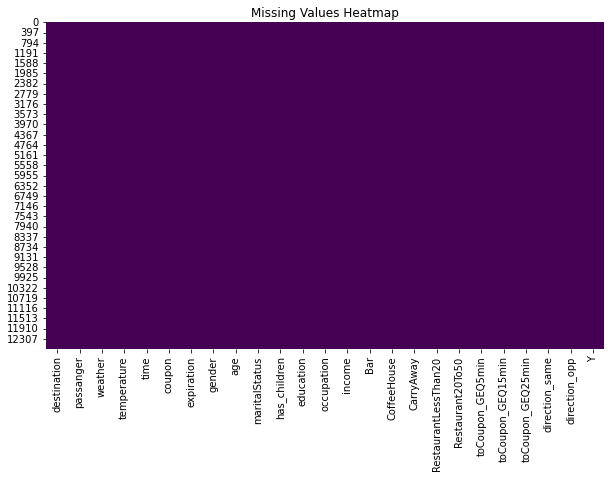

In [126]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

4. What proportion of the total observations chose to accept the coupon? 



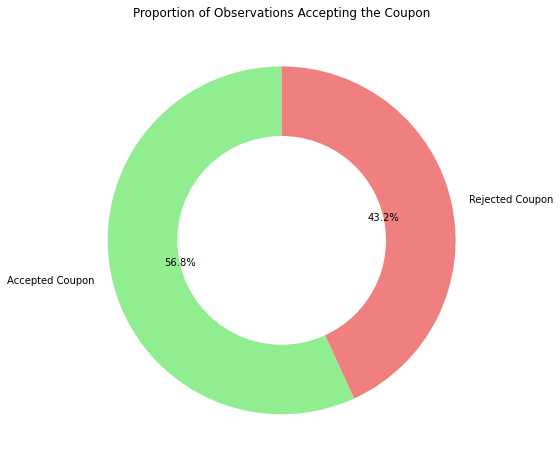

In [127]:
accepted_coupon_observations = df['Y'].sum()
rejected_coupon_observations = len(df) - accepted_coupon_observations

# Data for the pie chart
labels = ['Accepted Coupon', 'Rejected Coupon']
sizes = [accepted_coupon_observations, rejected_coupon_observations]
colors = ['lightgreen', 'lightcoral']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.4))
plt.title('Proportion of Observations Accepting the Coupon')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

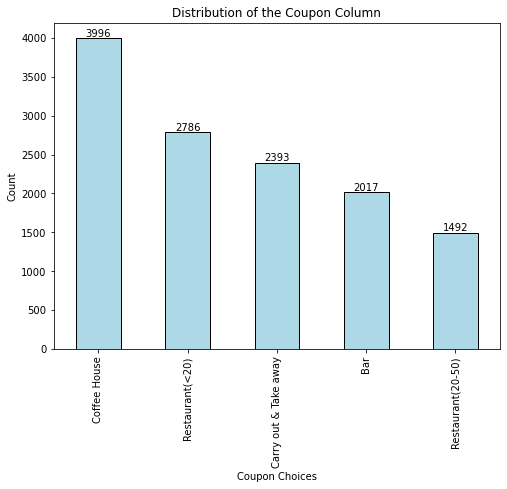

In [128]:
coupon_counts = df['coupon'].value_counts()

# Plotting coupon bar chart
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of the Coupon Column')
plt.xlabel('Coupon Choices')
plt.ylabel('Count')

# Adding annotations
for i, count in enumerate(coupon_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()

6. Use a histogram to visualize the temperature column.

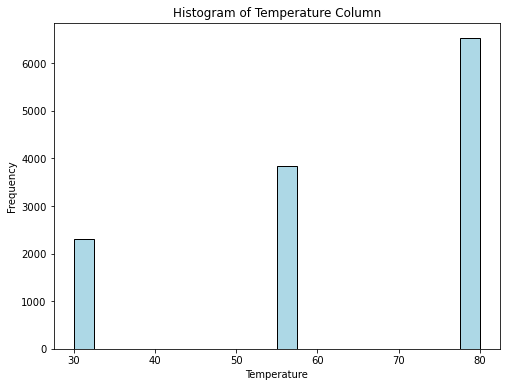

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(df["temperature"], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Temperature Column')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [130]:
bar_coupons_df = df[df['coupon'] == 'Bar'].copy()
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


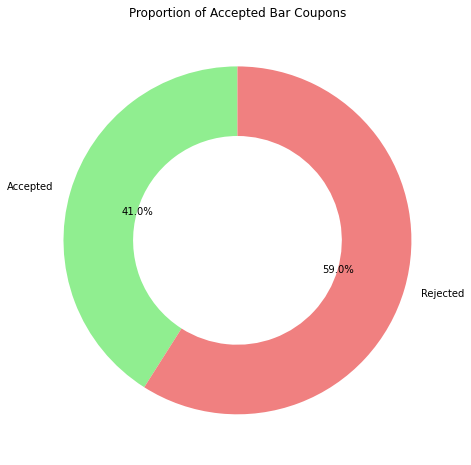

In [131]:
total_bar_coupons = len(bar_coupons_df)

# Calculate the number of accepted Bar coupons
accepted_bar_coupons = bar_coupons_df['Y'].sum()

# Data for the pie chart
labels = ['Accepted', 'Rejected']
sizes = [accepted_bar_coupons, total_bar_coupons - accepted_bar_coupons]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.4))
plt.title('Proportion of Accepted Bar Coupons')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


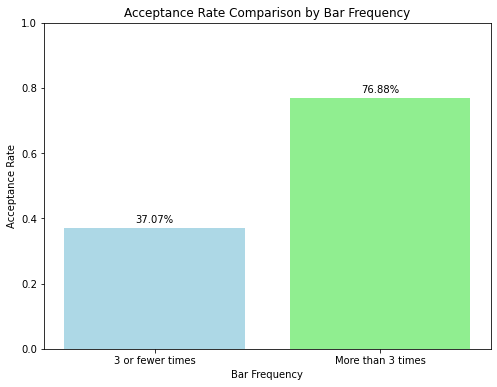

In [132]:
less_3 = ['never', 'less1', '1~3']
more_3 = ['4~8', 'gt8']

no_of_accepted_3_less = len(bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(less_3)) & (bar_coupons_df['Y'] == 1)])
no_of_accepted_went_more = len(bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(more_3)) & (bar_coupons_df['Y'] == 1)])


total_drivers_3_less = len(bar_coupons_df[bar_coupons_df['Bar'].isin(less_3)])
total_drivers_went_more = len(bar_coupons_df[bar_coupons_df['Bar'].isin(more_3)])

# Calculate acceptance rates
acceptance_rate_3_less = no_of_accepted_3_less / total_drivers_3_less
acceptance_rate_went_more = no_of_accepted_went_more / total_drivers_went_more

# Plotting the comparison
labels = ['3 or fewer times', 'More than 3 times']
values = [acceptance_rate_3_less, acceptance_rate_went_more]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.title('Acceptance Rate Comparison by Bar Frequency')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Adding annotations
for i, rate in enumerate(values):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center', va='bottom')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


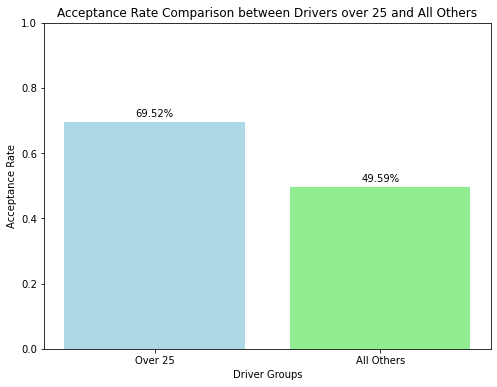

In [133]:
age_less25 = ['below21', '21']
age_more25 = ['26', '31', '50plus', '41', '36', '46']
bar_visit_values1 = ['1~3', '4~8', 'gt8']
bar_visit_values2 = ['never', 'less1', '1~3']

# Create a new column indicating whether a driver goes to a bar more than once a month and is over the age of 25
bar_coupons_df['Bar_Age_Group'] = '25plus'  # Default value for all rows
bar_coupons_df.loc[bar_coupons_df['age'].isin(age_less25), 'Bar_Age_Group'] = 'below25'

# Calculate the number of accepted coupons for each group
accepted_over_25 = len(bar_coupons_df.loc[(bar_coupons_df['Bar_Age_Group'] == '25plus') & (bar_coupons_df['Bar'].isin(bar_visit_values1)) & (bar_coupons_df['Y'] == 1)])
accepted_all_others = len(bar_coupons_df.loc[(bar_coupons_df['Bar_Age_Group'] == 'below25') | (~bar_coupons_df['Bar'].isin(bar_visit_values1)) & (bar_coupons_df['Y'] == 1)])

# Calculate the total number of drivers for each group
total_over_25 = len(bar_coupons_df[(bar_coupons_df['Bar_Age_Group'] == '25plus') & bar_coupons_df['Bar'].isin(bar_visit_values1)])
total_all_others = len(bar_coupons_df[(bar_coupons_df['Bar_Age_Group'] == 'below25') | (~bar_coupons_df['Bar'].isin(bar_visit_values1))])

# Calculate acceptance rates
acceptance_rate_over_25 = accepted_over_25 / total_over_25
acceptance_rate_all_others = accepted_all_others / total_all_others


# Plotting the comparison
labels = ['Over 25', 'All Others']
values = [acceptance_rate_over_25, acceptance_rate_all_others]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.title('Acceptance Rate Comparison between Drivers over 25 and All Others')
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Adding annotations
for i, rate in enumerate(values):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center', va='bottom')

plt.show()


<AxesSubplot:title={'center':'Count of Bar Visits by Age'}, xlabel='Age', ylabel='Count'>

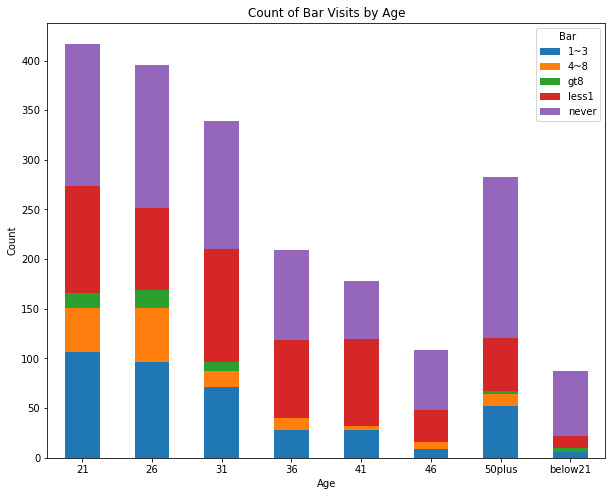

In [134]:
bar_coupons_df.groupby(['age', 'Bar']).size().unstack().plot(kind='bar', stacked=True,
                             title='Count of Bar Visits by Age', 
                                figsize=(10, 8), rot=0, xlabel='Age', ylabel='Count')

Certainly, there is a difference. Specifically, among drivers who visited the bar less than once a month and were under 25, there is an increase of drivers who accepted more coupons compared to the alternative category.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


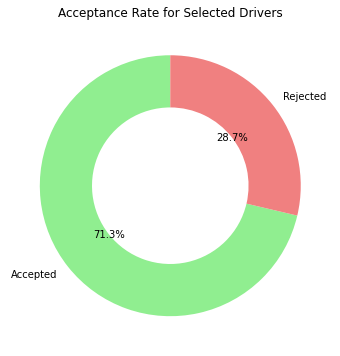

In [135]:
bar_visit_values1 = ['1~3', '4~8', 'gt8']
occ_values1 = ['farming', 'fishing', 'forestry']
pass_values1 = ['Kid(s)']
pass_values2 = ['Alone', 'Friend(s)', 'Partner']

# Select records with the right occupation type and passengers
occ_temp_data = bar_coupons_df.query("occupation not in @occ_values1")
selected_data = occ_temp_data.loc[(occ_temp_data['Bar'].isin(bar_visit_values1)) & (~occ_temp_data['passanger'].isin(pass_values1))]

# Calculate the number of accepted coupons for the selected group
accepted_selected = len(selected_data[selected_data['Y'] == 1])

# Calculate the total number of drivers for the selected group
total_selected = len(selected_data)

# Calculate acceptance rate
acceptance_rate_selected = accepted_selected / total_selected

labels = ['Accepted', 'Rejected']
values = [accepted_selected, total_selected - accepted_selected]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, wedgeprops=dict(width=0.4))
plt.title('Acceptance Rate for Selected Drivers')
plt.show()

In [136]:
print("The acceptance rate for drivers who frequented the bar more than once a month, had non-Kids passengers, and pursued occupations other than farming, fishing, or forestry is", acceptance_rate_selected) 

The acceptance rate for drivers who frequented the bar more than once a month, had non-Kids passengers, and pursued occupations other than farming, fishing, or forestry is 0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers who went to the Bar more than once a month with no Kids and Not Widowed: 0.6733167082294265


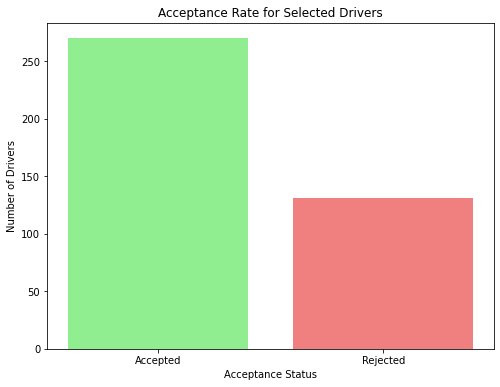

In [137]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
bar_visit_values1 = ['1~3', '4~8', 'gt8']
pass_values1 = ['Friend(s)', 'Partner']

selected_data = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(bar_visit_values1)) & (~bar_coupons_df['passanger'].isin(pass_values1)) & (bar_coupons_df['maritalStatus'] != 'Widowed')]

# Calculate the number of accepted coupons for the selected group
accepted_selected = len(selected_data[selected_data['Y'] == 1])

# Calculate the total number of drivers for the selected group
total_selected = len(selected_data)

# Calculate acceptance rate
acceptance_rate_selected = accepted_selected / total_selected

# Print the results
print("Acceptance rate for drivers who went to the Bar more than once a month with no Kids and Not Widowed:", acceptance_rate_selected)

# Plotting
labels = ['Accepted', 'Rejected']
values = [accepted_selected, total_selected - accepted_selected]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightgreen', 'lightcoral'])
plt.title('Acceptance Rate for Selected Drivers')
plt.xlabel('Acceptance Status')
plt.ylabel('Number of Drivers')
plt.show()

Acceptance rate for drivers who went to the Bar more than once a month and under age 30: 0.7217391304347827


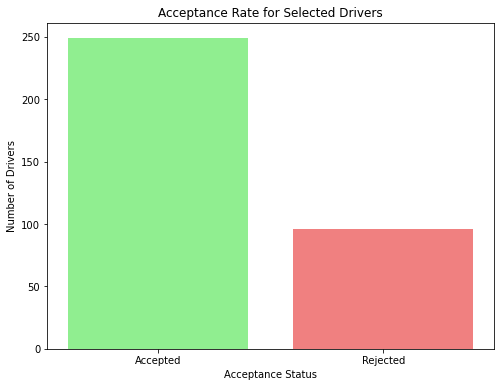

In [138]:
#go to bars more than once a month and are under the age of 30 OR
bar_visit_values1 = ['1~3', '4~8', 'gt8']
age_values1 = ['below21', '21', '26']

# Select records with the right conditions
selected_data = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(bar_visit_values1)) & (bar_coupons_df['age'].isin(age_values1))]

# Calculate the number of accepted coupons for the selected group
accepted_selected = len(selected_data[selected_data['Y'] == 1])

# Calculate the total number of drivers for the selected group
total_selected = len(selected_data)

# Calculate acceptance rate
acceptance_rate_selected = accepted_selected / total_selected

print("Acceptance rate for drivers who went to the Bar more than once a month and under age 30:", acceptance_rate_selected)

# Plotting
labels = ['Accepted', 'Rejected']
values = [accepted_selected, total_selected - accepted_selected]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightgreen', 'lightcoral'])
plt.title('Acceptance Rate for Selected Drivers')
plt.xlabel('Acceptance Status')
plt.ylabel('Number of Drivers')
plt.show()

Acceptance rate for drivers who went to Cheap Restaurant more than 4 times and income less than 50k: 0.4575645756457565


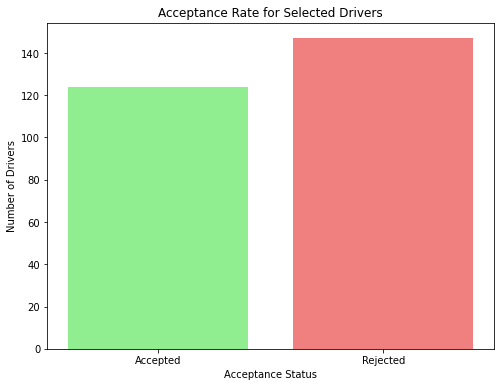

In [139]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_rest_visit_values1 = ['4~8', 'gt8']
income_values1 = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Select records with the right conditions
selected_data = bar_coupons_df.loc[(bar_coupons_df['RestaurantLessThan20'].isin(cheap_rest_visit_values1)) & (bar_coupons_df['income'].isin(income_values1))]

# Calculate the number of accepted coupons for the selected group
accepted_selected = len(selected_data[selected_data['Y'] == 1])

# Calculate the total number of drivers for the selected group
total_selected = len(selected_data)

# Calculate acceptance rate
acceptance_rate_selected = accepted_selected / total_selected

# Print the results
print("Acceptance rate for drivers who went to Cheap Restaurant more than 4 times and income less than 50k:", acceptance_rate_selected)

# Plotting
labels = ['Accepted', 'Rejected']
values = [accepted_selected, total_selected - accepted_selected]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['lightgreen', 'lightcoral'])
plt.title('Acceptance Rate for Selected Drivers')
plt.xlabel('Acceptance Status')
plt.ylabel('Number of Drivers')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Coupon Acceptance Analysis

| No | Coupon Acceptance Analysis                                                                       | Value (%) |
|----|-------------------------------------------------------------------------------------------------|-------|
| 1  | Drivers who went to Bar more than once a month with no Kids and occupation not (farming, fishing, or forestry) | 71   |
| 2  | Drivers who went to the Bar more than once a month with no Kids and Not Widowed                 | 67   |
| 3  | Drivers who went to the Bar more than once a month and under age 30                             |  72 |
| 4  | Drivers who went to Cheap Restaurant more than 4 times and income less than 50k                 | 45   |

### Observations:

1. **Drivers Visiting Bar More Than Once a Month:**
   - Drivers who go to the bar more than once a month are more likely to accept bar coupons.
   - This indicates a positive correlation between frequent bar visits and coupon acceptance.

2. **Drivers with No Kids and Non-Agricultural Occupation:**

   - Drivers who have no kids and are not involved in farming, fishing, or forestry (occupations that typically involve outdoor activities) accepted the largest number of coupons.
   - This suggests that drivers without family responsibilities and not engaged in outdoor occupations are more receptive to coupon offers.

3. **Drivers Under Age 30 Visiting Bar More Than Once a Month:**

   - This highlights a potential target group among younger drivers who frequent bars for bar coupon promotions.

4. **Drivers Visiting Cheap Restaurants More Than 4 Times with Income Less Than 50k:**

   - This suggests that drivers with lower income but frequenting cheap restaurants are responsive to coupon offers.

### Overall Observations:
- Drivers with specific characteristics, such as frequent bar visits, absence of kids, non-engagement in certain occupations, and being under the age of 30, show a higher likelihood of accepting coupons.
- Targeting drivers based on their behavior, demographics, and preferences can be an effective strategy for coupon campaigns.
- Further analysis and segmentation of the dataset can provide more insights into the drivers' preferences and behaviors, enabling more targeted marketing efforts.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [140]:
# Investigating the Coffee House Drivers
coffee_house_data = df.query("coupon == 'Coffee House'")
coffee_house_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


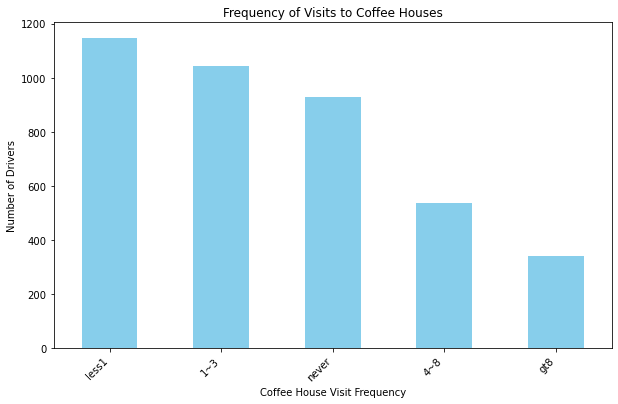

In [142]:
plt.figure(figsize=(10, 6))
coffee_house_data['CoffeeHouse'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Visits to Coffee Houses')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45, ha='right')
plt.show()

Number of drivers who go to the Coffee House when it's Rainy: 409


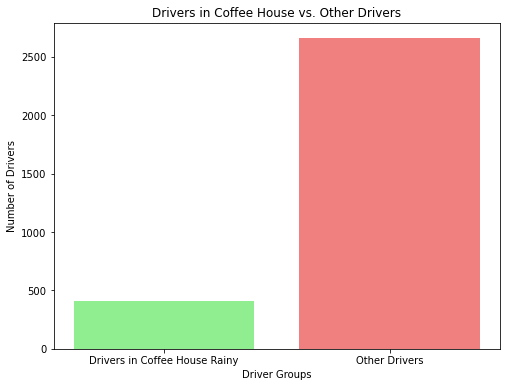

In [154]:
weather_values1 = ['Snowy', 'Rainy']

# Create a temporary dataset excluding drivers that don't go to the coffee house
coffee_temp_data = coffee_house_data.query("CoffeeHouse != 'never'")

# Count the number of drivers who go to the coffee house when it's Rainy
no_of_drivers_coffee_house = len(coffee_temp_data.loc[coffee_temp_data['weather'].isin(weather_values1)])

print("Number of drivers who go to the Coffee House when it's Rainy:", no_of_drivers_coffee_house)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Drivers in Coffee House Rainy', 'Other Drivers'], [no_of_drivers_coffee_house, len(coffee_temp_data) - no_of_drivers_coffee_house], color=['lightgreen', 'lightcoral'])
plt.title('Drivers in Coffee House vs. Other Drivers')
plt.xlabel('Driver Groups')
plt.ylabel('Number of Drivers')
plt.show()


Number of male drivers with kids and partners going to the Coffee House: 236


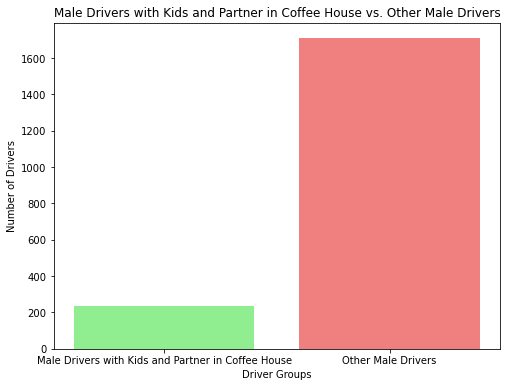

In [151]:
pass_values1 = ['Kid(s)', 'Partner']

# Create a temporary dataset excluding drivers that don't go to the coffee house
coffee_temp_data1 = coffee_house_data.query("gender == 'Male'")

# Count the number of female drivers with kids and partners who go to the coffee house
no_of_male_kids_partner = len(coffee_temp_data1.loc[coffee_temp_data1['passanger'].isin(pass_values1)])

# Print the result
print("Number of male drivers with kids and partners going to the Coffee House:", no_of_male_kids_partner)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Male Drivers with Kids and Partner in Coffee House', 'Other Male Drivers'], [no_of_male_kids_partner, len(coffee_temp_data1) - no_of_male_kids_partner], color=['lightgreen', 'lightcoral'])
plt.title('Male Drivers with Kids and Partner in Coffee House vs. Other Male Drivers')
plt.xlabel('Driver Groups')
plt.ylabel('Number of Drivers')
plt.show()


Number of female drivers with kids and partners going to the Coffee House: 276


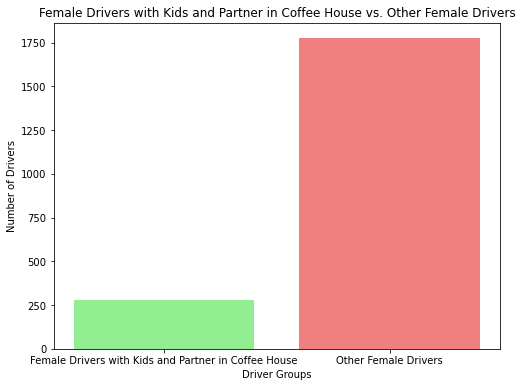

In [150]:
pass_values1 = ['Kid(s)', 'Partner']

# Create a temporary dataset excluding drivers that don't go to the coffee house
coffee_temp_data1 = coffee_house_data.query("gender == 'Female'")

# Count the number of female drivers with kids and partners who go to the coffee house
no_of_female_kids_partner = len(coffee_temp_data1.loc[coffee_temp_data1['passanger'].isin(pass_values1)])

# Print the result
print("Number of female drivers with kids and partners going to the Coffee House:", no_of_female_kids_partner)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Female Drivers with Kids and Partner in Coffee House', 'Other Female Drivers'], [no_of_female_kids_partner, len(coffee_temp_data1) - no_of_female_kids_partner], color=['lightgreen', 'lightcoral'])
plt.title('Female Drivers with Kids and Partner in Coffee House vs. Other Female Drivers')
plt.xlabel('Driver Groups')
plt.ylabel('Number of Drivers')
plt.show()


Number of drivers with a College Degree going to the Coffee House: 2318


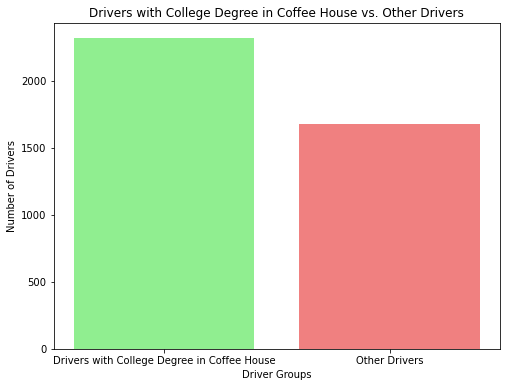

In [153]:
college_values1 = ['Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'Associates degree']

# Count the number of drivers with a college degree who go to the coffee house
no_of_drivers_college_degree = len(coffee_house_data.loc[coffee_house_data['education'].isin(college_values1)])

print("Number of drivers with a College Degree going to the Coffee House:", no_of_drivers_college_degree)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Drivers with College Degree in Coffee House', 'Other Drivers'], [no_of_drivers_college_degree, len(coffee_house_data) - no_of_drivers_college_degree], color = ['lightgreen', 'lightcoral'])
plt.title('Drivers with College Degree in Coffee House vs. Other Drivers')
plt.xlabel('Driver Groups')
plt.ylabel('Number of Drivers')
plt.show()
